**The Relationship between Bank Term Subscriptions, Age and Bank Balance**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

ERROR: Error in library(themis): there is no package called ‘themis’


**Introduction**<br/>
The Bank Marketing dataset was gathered from a direct marketing campaign of a Portuguese baking institution. The bank collected information from their clients over the phone, and each client was contacted multiple times. The Bank Marketing Dataset discusses multiple characteristics of each client in hopes of predict whether they will subscribe to a term deposit. In simplest terms, a bank term deposit is when a certain sum of money is deposited and kept in the bank for a specific period of time. The information collected in the dataset includes clients' age, job, education, marital status, balance, education, and housing to name a few.

The question our project aims to answer is: Will new clients subscribe or not subscribe to a bank term deposit? A K-nearest classification model algorithm was built to answer this question and the process is further described below.

**Methods** (Overview) <br/>
A preliminary data analysis was completed to review the information available to us as well as choose the main predictors to use for the project. The two predictors chosen for the project were age and yearly balance. These two were chosen they can easily be grasped by anyone, not only people familier with banking terminology. In addition, there are various generalizations that different age groups have in regards to the money they may possess. For instance, it is more likely that an older person will have more money than someone that just graduated highschool. While this may not be universally true, it is true enough that most people could easily grasp this statement and believe it.

In summary, the dataset was first loaded into R from an external website and converted into a .csv file format to ensure that it can be worked with efficiently. The functions head and tail were used to show snippets of the dataset to ensure readability. The select function was then used on the bank dataset to extract the columns we are interested in working with: age, balance and y. The data was then split using the function inital_split. The training set (bank_train) and testing (bank_test) were created to be used for training and testing respectively.
We then created a scatter plot of the unscaled age and and balance. Red and blue data points were used to denote whether or not someone subscribed to a bank term deposit. This was done as part of our initial exploratory analysis.

The initial plot showed that there are lots of 'no' comparing to 'yes', thus the data was upsampling to ensure that there are relatively equal amounts of both classes in our data when creating the model. The data was also scaled and centered and then used to create a new plot. We created an initial K-nearest neighbors algorithm, using it to make predictions on our test set and the computed its accuracy. A 5-fold cross validation was then done to allow us to pick the best K value for our model, and then the model was recreating using the K that gives the most accurate predictions.

**Table 1.0 - Bank Data**

To reiterate, we began by first loading the data from the source website. As it was a zip file, it needed to be unziped first (with function unzip) before it could be read in. Then the dataset was read in as a .csv file and the variable "y(whether client subscribe to term deposit)" was mutated into a factor. The functions head() and tail() were used to show snippets of the data. The final result is two tables with 15 predictors and the factor y because no particular columns were selected as of yet.


In [2]:
temp <- tempfile()
temp2 <- tempfile()

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

download.file(url, temp)
unzip(zipfile = temp, exdir = temp2)

bank_data <- read_csv2(file.path(temp2, "bank.csv")) %>%
    mutate(y = as_factor(y))
unlink(c(temp, temp2))
head(bank_data)
tail(bank_data)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  age = col_double(),
  job = col_character(),
  marital = col_character(),
  education = col_character(),
  default = col_character(),
  balance = col_double(),
  housing = col_character(),
  loan = col_character(),
  contact = col_character(),
  day = col_double(),
  month = col_character(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  poutcome = col_character(),
  y = col_character()
)



age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


**Table 1.1 - Selected Columns of Bank Data**

From the original bank dataset, we want a data frame containing only the columns we are interested: age and balance. We choose those two variables under the assumption that age and balance will greatly effect client subscriptions or lack thereof to a term deposit based on how currency works in most countries today. For example, it is likely that those with more money are more likely to subscribe to bank term deposits as they will have more money to store away. Also, generally older people have more money as opposed to young people as they have had more opportunities to earn money, which means they are more likely to subscibe to a bank term deposit.

Again, to visualize portions of the new data frame bank_age_balance, the functions head() and tail() were used. 

In [3]:
bank_age_balance <- bank_data %>% 
    select(age,balance,y)

head(bank_age_balance)
tail(bank_age_balance)

age,balance,y
<dbl>,<dbl>,<fct>
30,1787,no
33,4789,no
35,1350,no
30,1476,no
59,0,no
35,747,no


age,balance,y
<dbl>,<dbl>,<fct>
32,473,no
33,-333,no
57,-3313,no
57,295,no
28,1137,no
44,1136,no


**Table 2.0 - Split of Data**

We will use 75% of the data for training, and 25% for testing since we do not want too small of a training or testing set. Splitting the dataset will allow us to later train the classifier with majority of the data and then test the classifier's accuracy to evaluate how accurate the model we create it. We will specify that prop = 0.75 so that 75% of our original data set ends up in the training set. We will set the strata argument to y to ensure that the training and testing subsets contain the right proportions of each category of observations. 

In [4]:
# Splitting the data into training data and testing data
bank_split <- initial_split(bank_age_balance, prop = 0.75, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)


As part of the preliminary analysis, a scatterplot of the unscaled age and balance data was created. Age was placed on the x-axis as it is the independent variable and balance was placed on the y-axis as it is the dependent variable.

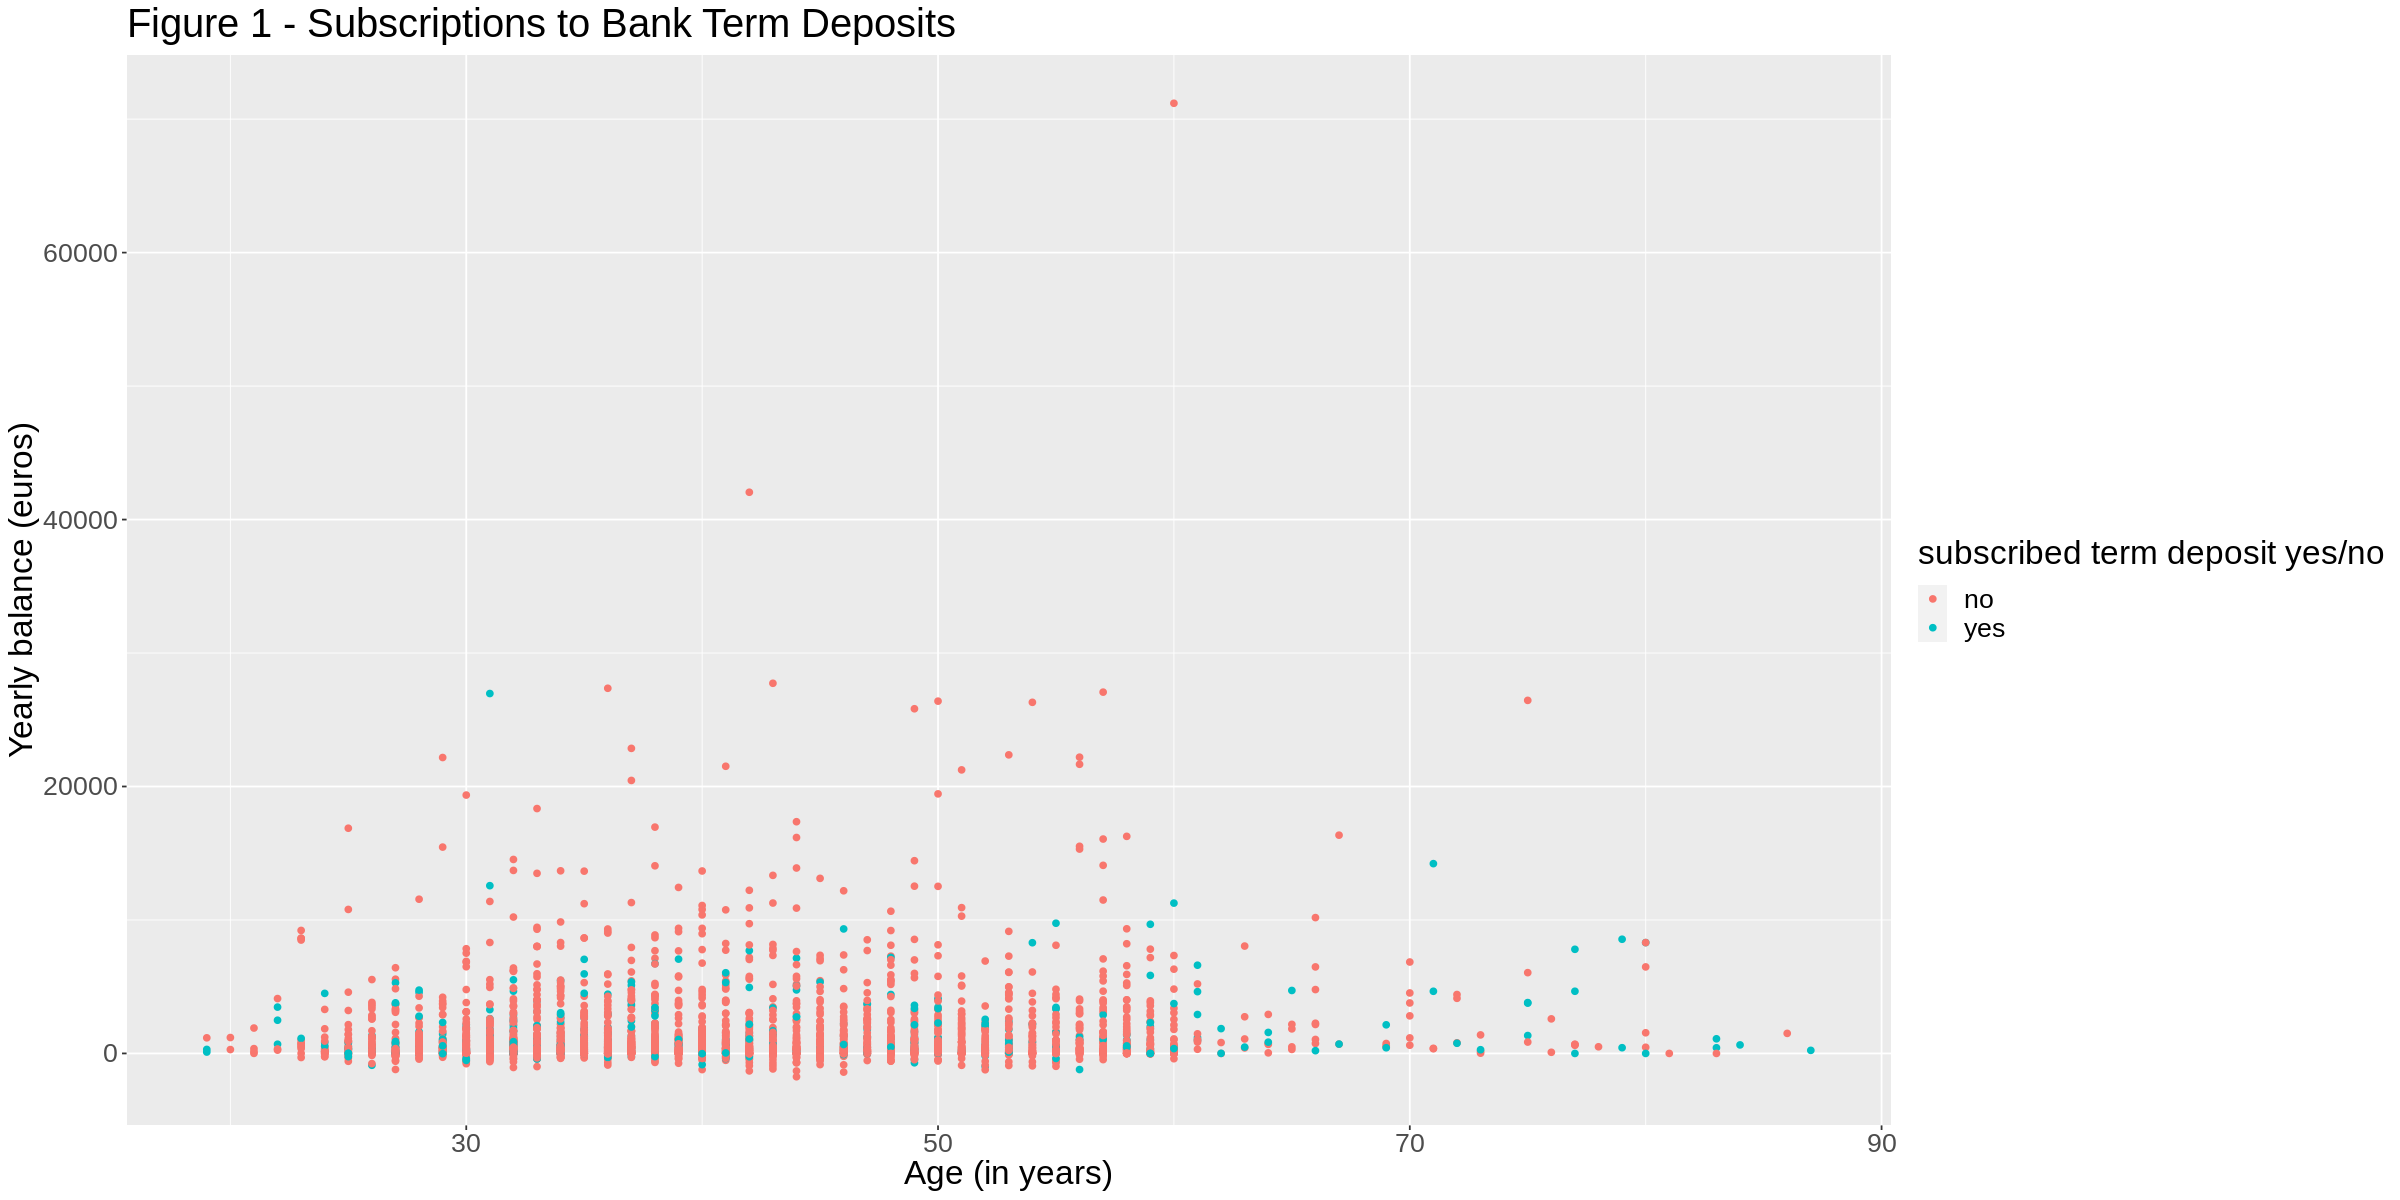

In [5]:
options(repr.plot.width = 20, repr.plot.height = 10)

bank_train_plot <- bank_train %>%
    ggplot(aes(x = age, y = balance, color = y)) +
    geom_point() + 
    labs(x = "Age (in years)", y = "Yearly balance (euros)",
        colour = "subscribed term deposit yes/no") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 1 - Subscriptions to Bank Term Deposits")

bank_train_plot

As you can see in the plot above, there are lots of 'no' compared to 'yes'. This means that the data is very imbalanced which will affect how useful the model we create will be. Since classifiers like the k-nearest neighbor algorithm use the labels of nearby points to predict the label of a new point, if there are many more data points with one label overall, the algorithm is more likely to pick that label in general. We are going to upsample the observations to rebalance the data.

Also, K-nearest neighbors is sensitive to the scale of the predictors so we will also do some preprocessing to standardize them. We will scale the data and center it using step_scale() and step_center(). 

**Table 3.0 - Scaling, Balancing, Centering Training Data**

First, we upsample y to balance the data. In order to do this, we will add an upsampling step to the bank_train data frame with the step_upsample function from the themis R package. Then, we will scale and center all the given predictors.

To finalize the recipe and apply the scaling and centering to the data, we use the prep() and bake() functions. Then, we will use the group_by and summarize functions to show that our classes are now balanced.

In [11]:
# Creating the recipe, upsampling the y, scaling and centering the data
bank_recipe <- recipe(y ~ ., data = bank_train) %>%
    step_normalize(age,balance) %>%
    step_upsample(y, over_ratio = 1, skip = FALSE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# using prep and bake on the recipe
bank_recipe2 <- bank_recipe%>%
    prep()%>%
    bake(bank_train)

new_recipe <- recipe(y ~ ., data = bank_recipe2)

# showing that our classes are now balanced
show_balance <- bank_recipe2 %>%
    group_by(y) %>%
    summarize(n = n())

show_balance

`summarise()` ungrouping output (override with `.groups` argument)



y,n
<fct>,<int>
no,3000
yes,3000


Now that we have upsampled and scaled the dataset, we want to create a new plot of the scaled age and balance with the factor y colored for each data point. The new plot is noticebly different. This is because the data is now upsampled, so that there are more blue dots representing 'yes' and the data is now scaled and centered so the axes no longer represent the raw ages or balances from the dataset but rather the standardized ages and balances.

In real life age can never be negative, and bank balances are typically exceed 15 euros however by the standardizing the data, we are able to ensure that the size, range and average of the predictors, age and balance, does not impact our results unintentionally. More specifically, we don't want the large range of the bank balances to have a larger effect than the ages which have a smaller range and scale.

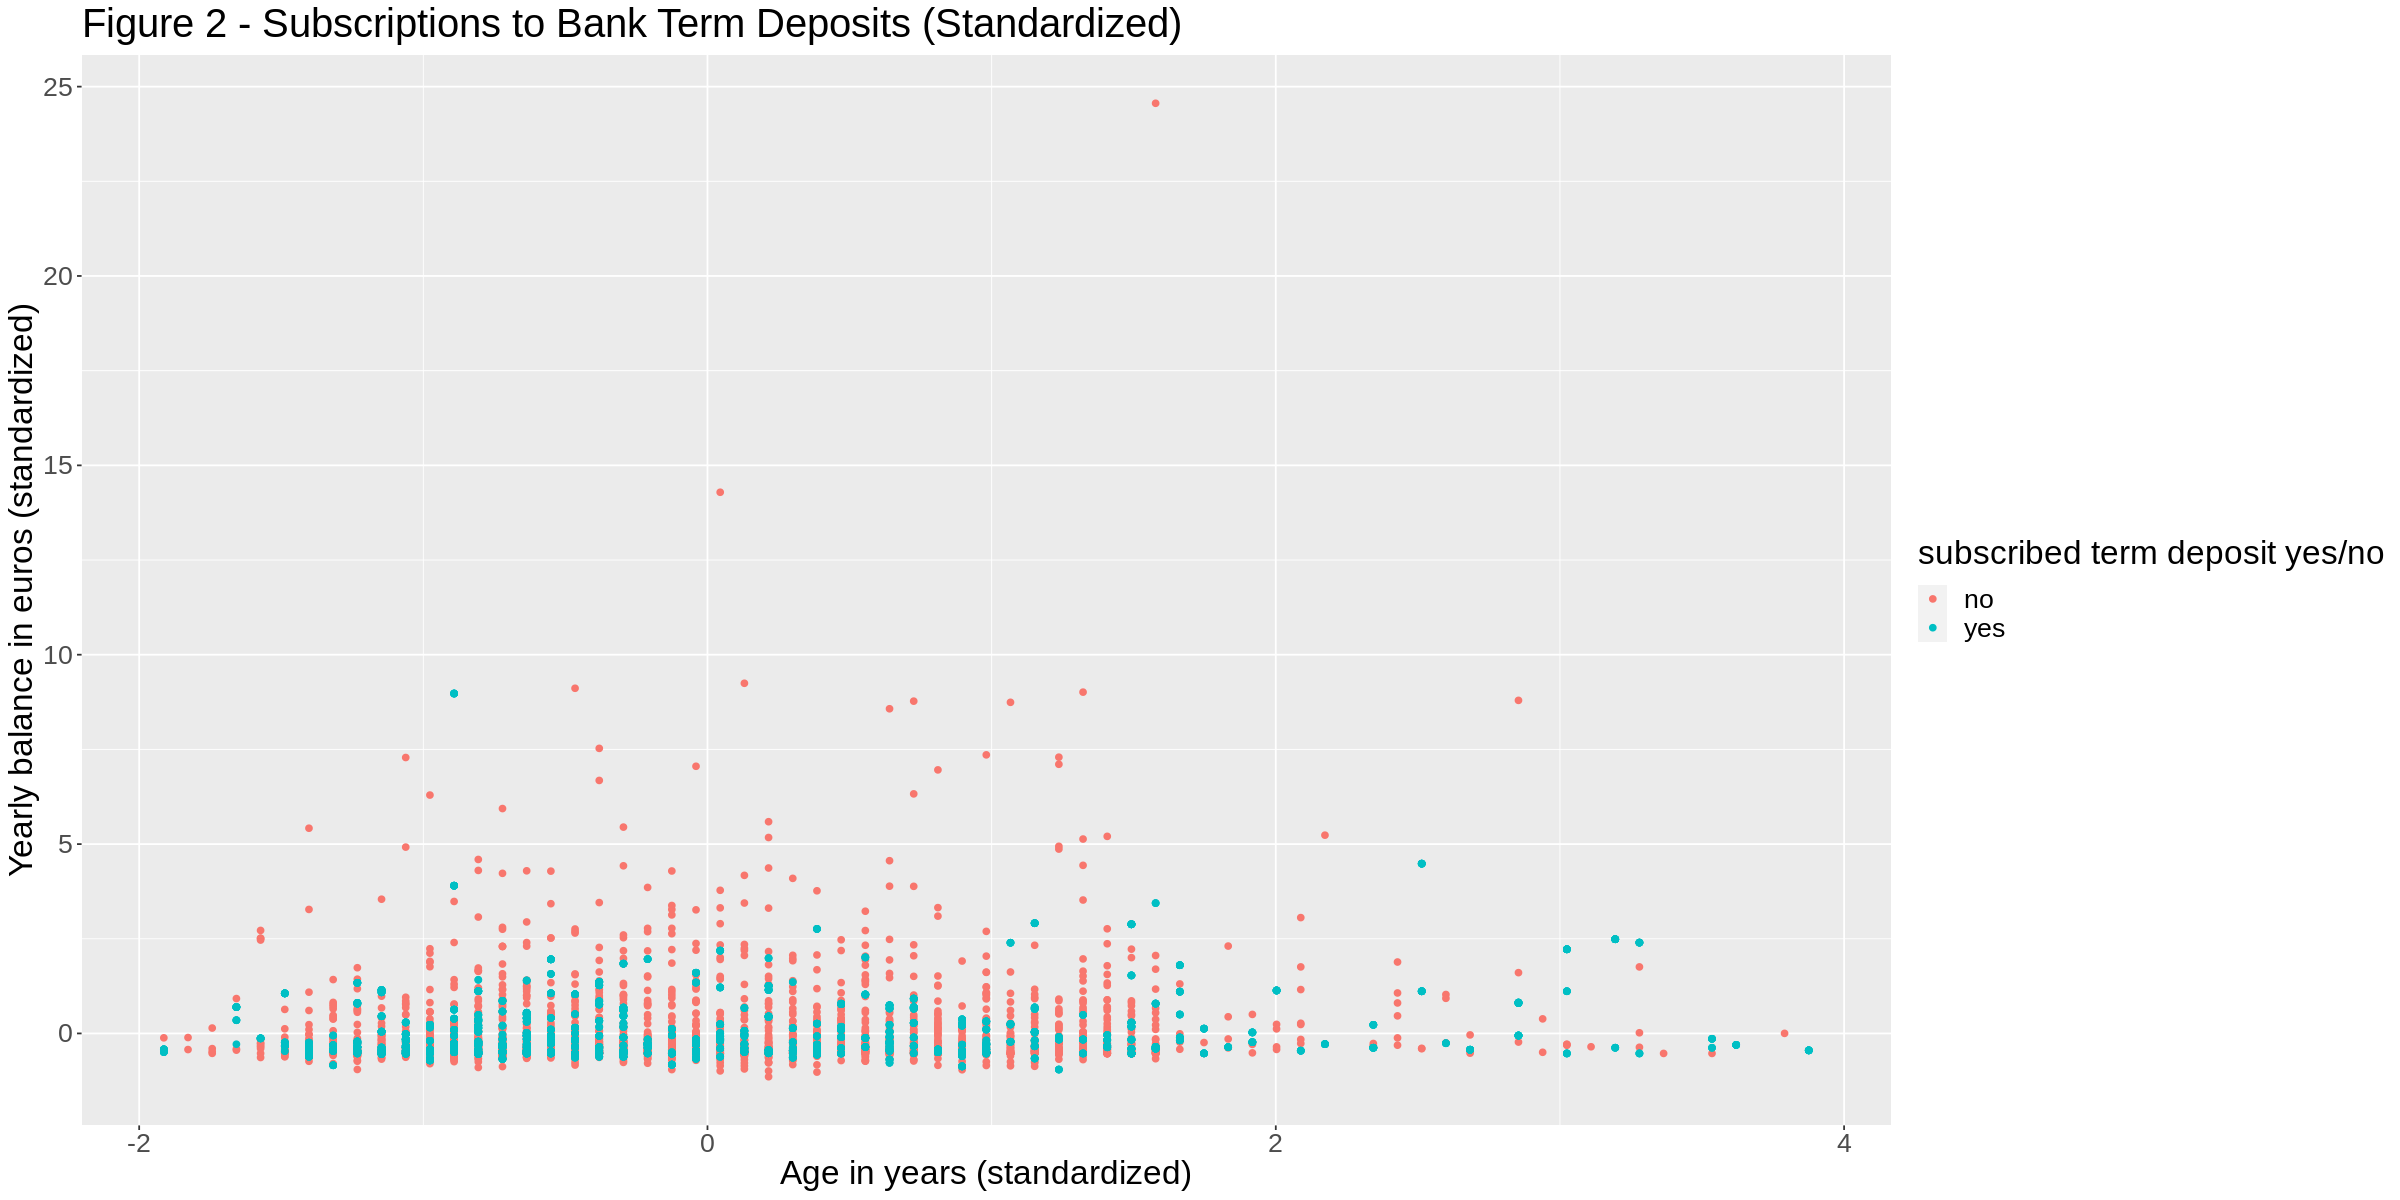

In [12]:
options(repr.plot.width = 20, repr.plot.height = 10) 

balanced_bank_plot <- bank_recipe2 %>%
    ggplot(aes(x = age, y = balance, colour = y)) +
    geom_point() + 
    labs(x = "Age in years (standardized)", y = "Yearly balance in euros (standardized)",
        colour = "subscribed term deposit yes/no") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 2 - Subscriptions to Bank Term Deposits (Standardized)")

balanced_bank_plot

To begin perfoming the K-nearest neighbors algorithm with tidymodels, we began by creating the model specification. We first randomly chose K=10 and which will later be changed to a more appropriate number during the later tuning stages. We want all the neighbors to have only 1 opportunity to impact the data (or vote) thus we inputted 'rectangular' for weight_func. We also specified that we are using the kknn package and a classification in set_engine and set_mode respectively. 

The model we created was then passed into the fit function to that we could fit the model onto the bank training data. Once we run the cell, the information below shows the engine used to train the model (kknn::train.kknn), the fractions of errors made by our model and the weight function and K value that we inputted. 

In [13]:
# creating the model specification
bank_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# passing the model we created into the fit function
bank_fit <- workflow() %>%
    add_recipe(new_recipe) %>%
    add_model(bank_model) %>%
    fit(data = bank_train)

bank_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~10, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1167797
Best kernel: rectangular
Best k: 10

**Table 4.0 - Predictions & Accuray of K=10 Model**

Now that we have created our initial K-nearest neighbor classifier we will predict the class labels (y) for our test set. The function bind_cols was used to add the new column .pred_class to the test set tables so that the group could see the ages and balances alongside the new column. 

We then use the metrics functions to assess the accuracy of our classifier. We specified the truth argument to be our class label y and the estimate to be .pred_class to gather the statistics about the quality of the model. From the table below, we can see that the accuracy of the model is 88.1%.

In [14]:
# predicting the class labels of the test set
bank_test_predictions <- predict(bank_fit, bank_test) %>%
    bind_cols(bank_test)

head(bank_test_predictions)
tail(bank_test_predictions)

# assessing the accuracy of our predictions
bank_prediction_accuracy <- bank_test_predictions %>%
    metrics(truth = y, estimate = .pred_class)%>%
    filter(.metric == "accuracy") 

bank_prediction_accuracy

.pred_class,age,balance,y
<fct>,<dbl>,<dbl>,<fct>
no,36,307,no
no,39,147,no
no,20,502,yes
no,40,194,no
no,37,2317,no
no,44,106,no


.pred_class,age,balance,y
<fct>,<dbl>,<dbl>,<fct>
no,42,-91,no
no,42,-166,no
no,42,642,no
no,49,322,no
no,57,-3313,no
no,44,1136,no


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8840708


**Table 5.0 - 5-Fold Cross Validation**

We would like to choose a better K value for our K-neighbour classification model, so we tune the classifier by performing a cross-validation on our training set. We chose to perform a 5-fold cross-validation because five different validation splits should be sufficient for the application of our data. While a 10-fold validation would most likely provide a better accuracy, it would take the system longer to compute and an accuracy below 95% for our purposes will not result in any life or death consequences. 

Instead of specifying a specific K value we insert tune() to keep it as a changing parameter.

Below we also perform the workflow again (with a few changes to take into account that we want to perfom a 5-fold cross validation) to calculate an accuracy for each K value in a reasonable range, and we pick the K value that gives best accuracy.

In [17]:
bank_vfold <- vfold_cv(bank_train, v = 5, strata = y)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
knn_tune

knn_results <- workflow() %>%
      add_recipe(new_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = bank_vfold, grid = 10) %>%
      collect_metrics()

head(knn_results)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7891464,5,0.005570372,Model1
1,roc_auc,binary,0.5026899,5,0.010606334,Model1
3,accuracy,binary,0.8501905,5,0.002949395,Model2
3,roc_auc,binary,0.5196603,5,0.006548950,Model2
5,accuracy,binary,0.8723070,5,0.002145567,Model3
5,roc_auc,binary,0.5358769,5,0.006926071,Model3


To chose which number of neighbors/K would be the best for our model, we will create a plot using the accuracies dataset with the K value on the x-axis and the estimate accuracy on the y-axis. The accuracies are filtered from the knn_nn results using .metric.

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


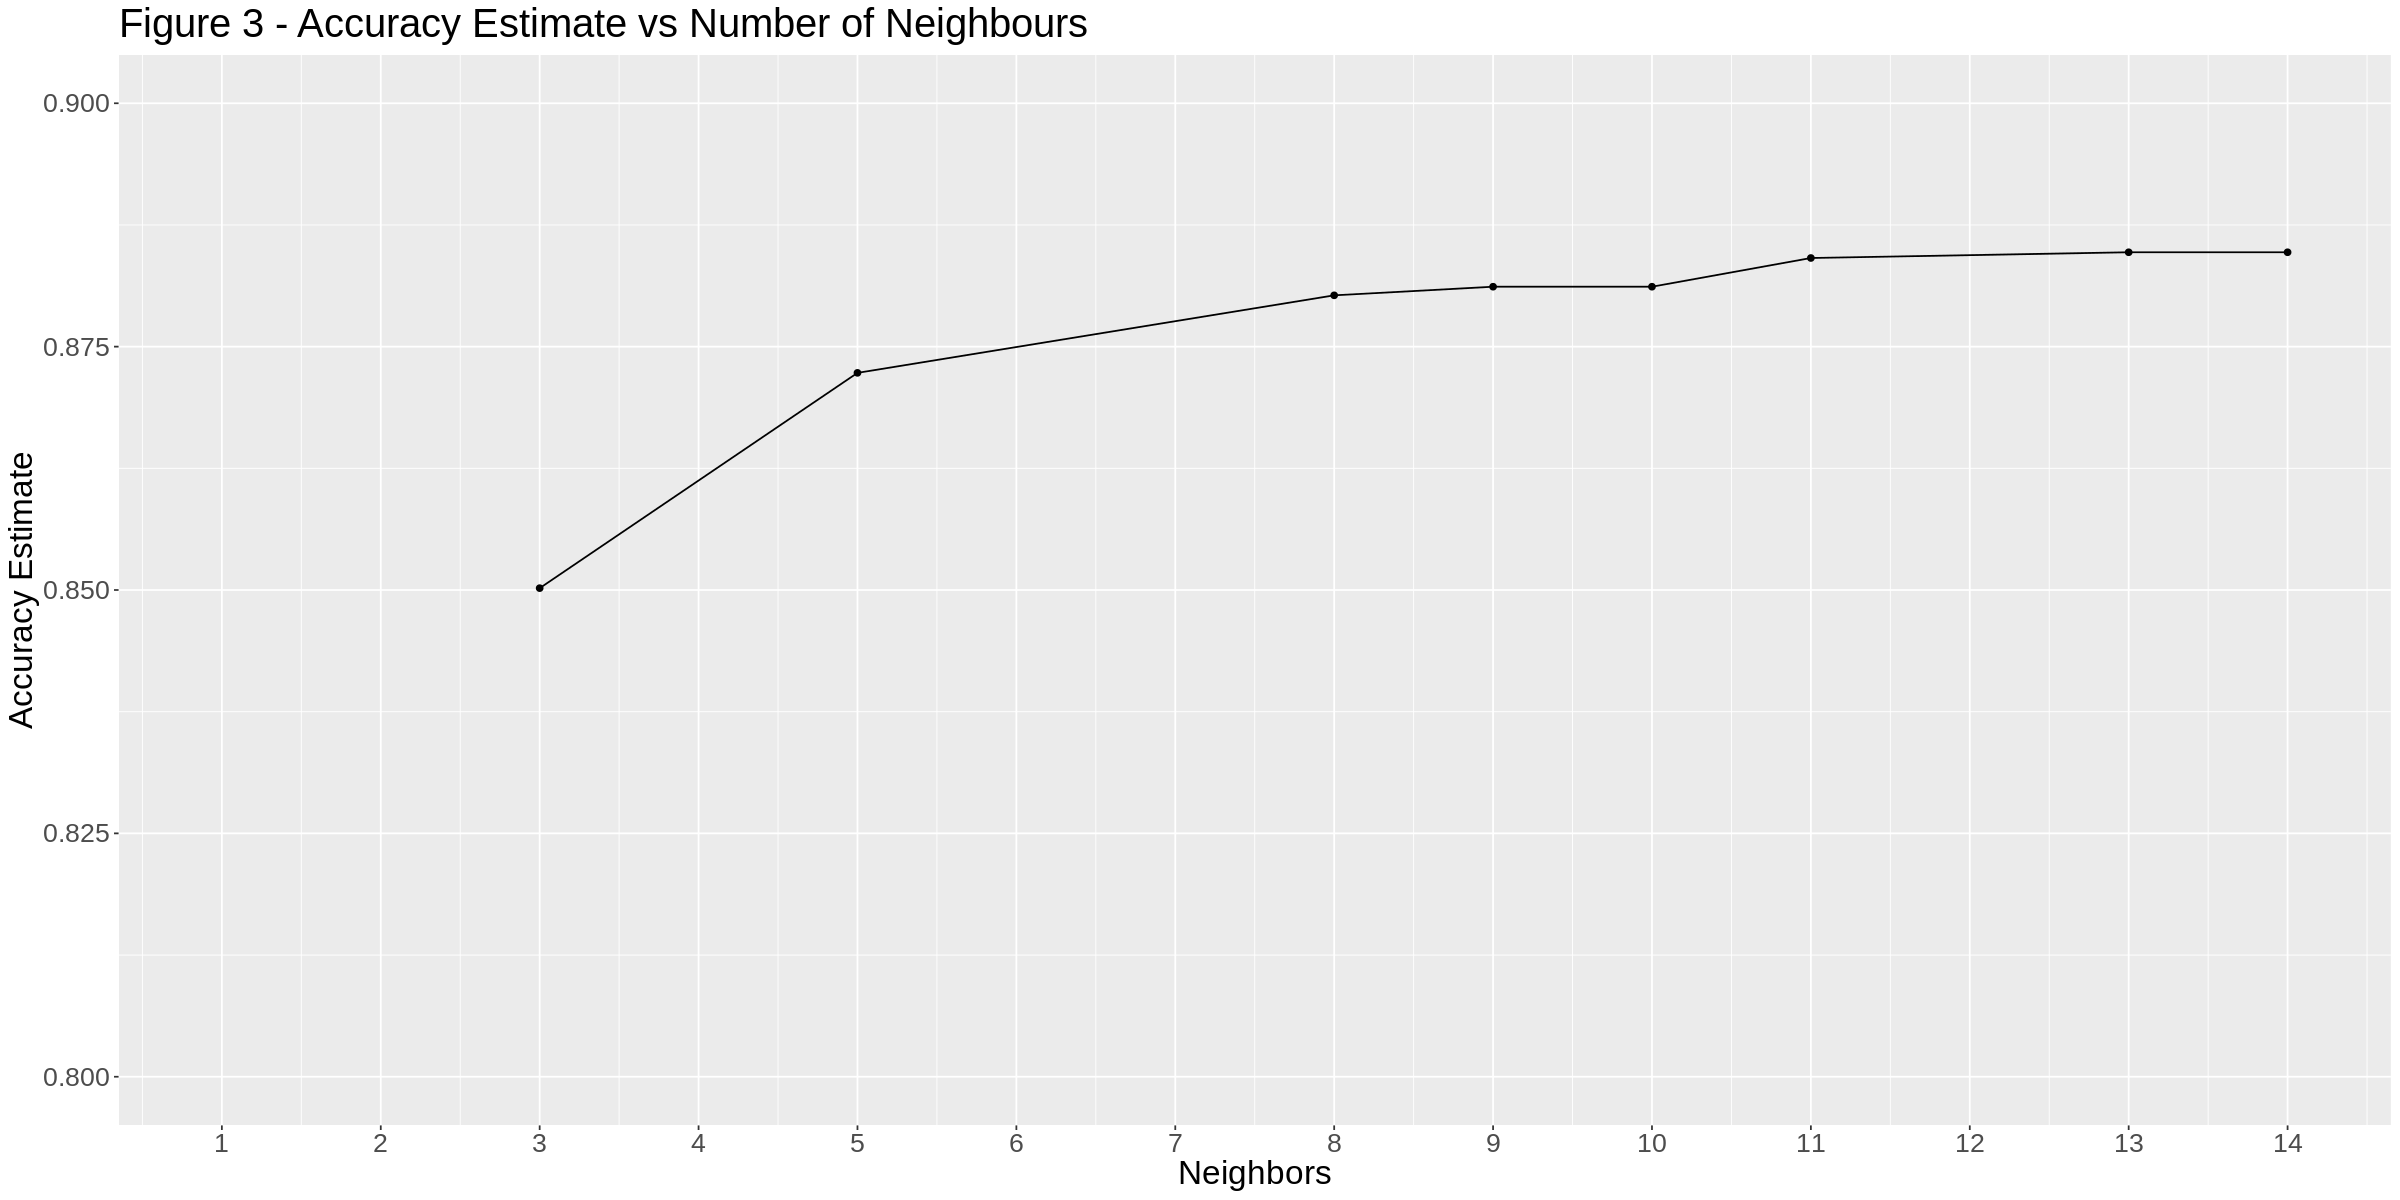

In [22]:
accuracies <- knn_results %>% 
      filter(.metric=="accuracy")

options(repr.plot.width = 20, repr.plot.height = 10) 
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.8, 0.9)) + # adjusting the y-axis
ggtitle("Figure 3 - Accuracy Estimate vs Number of Neighbours") +
theme(text = element_text(size = 20)) 
accuracy_versus_k

**Table 6.0 - Accuracy of Model**

From the graph above, K=13 gives the best accuracy because it gives the highest accuracy of approximately 88%. With this information, we will build our model specification with the best value for K(K=13). The model will then be used to predict the class labels of our testing set and then the accuracy of these predictions will be evaluated using metrics and filter. 

In [23]:
# creating the model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# passing the model we created onto the fit function
bank_fit <- workflow() %>%
    add_recipe(new_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = bank_train)

# predicting out class labels
bank_test_predictions <- predict(bank_fit, bank_test) %>%
    bind_cols(bank_test)
head(bank_test_predictions)

# assessing the accuracy of our predictions
bank_prediction_accuracy <- bank_test_predictions %>%
    metrics(truth = y, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

bank_prediction_accuracy

.pred_class,age,balance,y
<fct>,<dbl>,<dbl>,<fct>
no,36,307,no
no,39,147,no
no,20,502,yes
no,40,194,no
no,37,2317,no
no,44,106,no


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8849558


The resulting table above shows that the model we created using the standardardized age and balance, predicts the class lables of new observations with an accuracy of 88.4%.

**Results**<br/>
The K-nearest neighbors algorithm we created was applied with K=13. The model we created to predict whether or not a new client will subscribe to a bank term deposit based on their age and bank balance was found to have an accuracy of 88.4%.

**Discussion: Expected Outcomes & Significance**

Based on our findings, it seems that balance plays a more significant role on if a person will subscribe to term deposit or not. In figure 2, we can see that the ratio of yes or no stays quite consistent throughout all ages. Overall, there are more people willing to subscribe to a term deposit at any age than there are people who are not willing to. However, the main split can be seen within the varying balances. It is clear that those with much higher balances are not willing to subscribe to a term deposit; most people with a standardized yearly balance larger than 2 said no. This strong bias for wealthier individuals to say no is the opposite of what we expected. It is reasonable to suspect that those with lower balances would be more willing to put away their money for a period of time and benefit from a rate of interest. 

Studying this data provides insights of clientele behaviour to the bank. A company should always understand their consumer demographic and work accordingly to their actions and needs. When the bank sees that all ages are willing to subscribe, they may come up with different marketing strategies that will be of interest to the young and old. As for future questions, more  variables can be compared to get a more precise understanding of what factors affect a person's reasoning for subscribing or not. For example, perhaps all ages are willing, but it may be difficult for the bank to communicate their offers to such a diverse group of people. Performing more analysis and comparing different variables will help us understand which factor is the most influential and allow the bank to cooperate accordingly.

**References**

    Assistant, T. (n.d.). Piazza • Ask. answer. explore. whenever. DSCI 100 Piazza. Retrieved December 5, 2021, from https://www.piazza.com/. 
    
    [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
    
    What's the difference between a term deposit and a savings account? Westpac. (n.d.). Retrieved December 6, 2021, from https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/. 
    
    Timbers, T.-A., Campbell, T., &amp; Lee, M. (2021, November 18). Data science: A first introduction. Chapter 10 Statistical inference. Retrieved December 7, 2021, from https://ubc-dsci.github.io/introduction-to-datascience/inference.html. 
   